<a href="https://colab.research.google.com/github/JorgeZarama/python/blob/main/Estudio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import zipfile as zp # para descomprimir archivos zip
import urllib.request # para descargar de URL
import os
import numpy as np
import pandas as pd
import requests
import http.client
import io
import matplotlib.pyplot as plt
import seaborn as sns

Crear una función que reciba un array de NumPy y devuelva otro en el cual estén marcados como True los elementos duplicados (a partir de la segunda ocurrencia), y como False los no repetidos o las primeras ocurrencias de los duplicados.

In [ ]:
numbers = np.array([4, 4, 4, 3, 8, 1, 9, 6, 1, 5, 9, 4, 0, 2])
expected_output = np.array([False, True, True, False, False, False, False, False, True, False, True, True, False, False])
output = find_duplicates(numbers)   # This calls your function find_duplicates
assert(np.array_equal(expected_output, output))  # This will fail if the result is not as expected

In [ ]:
#numbers = np.array([4, 4, 4, 3, 8, 1, 9, 6, 1, 5, 9, 4, 0, 2])
def find_duplicates(array):
  _, index = np.unique(array, return_index=True)
  result = np.full(len(array), True)
  result[index] = False
  return result



In [ ]:
def find_duplicates(array):
  array = np.array(array)
  conjunto_array = set(array)
  result = np.full(len(array), True)
  for i in conjunto_array:
    for j in range(len(array)):
        if i == array[j]:
          result[j] = False
          break
  return result


Crear un objeto Series con 10 elementos, que contenga más de un tipo básico, con índices de tipo string
Demuestra que los datos con índices posicionales son los mismos que los obtenidos con índices semánticos, seleccionando a través de slicing, al menos 4 elementos de la serie anterior

In [ ]:
serie = pd.Series([0, 1, 2, 3, "Hola", 5, True, 6, 7 ,8, "Hola"], index = list("abcdefghijk"))
display(serie.iloc[1:3]==serie.loc["b":"c"])

b    True
c    True
dtype: bool

Crear un DataFrame de dimensiones 10x10, con números aleatorios en el rango [0,20]
Reemplazar todos aquellos elementos menores de 5 por NaN
Averiguar cuantos elementos tienen Nan por fila

In [ ]:
matriz = np.random.randint(low=0, high=20, size=(10,10))
frame = pd.DataFrame(matriz)
frame[frame < 5] = np.nan
display(frame)
for i in range (frame.shape[0]):
  print("En la fila",i,"hay",len(frame.loc[i][:][frame.loc[i][:].isnull()]),"Nuls")


,0,1,2,3,4,5,6,7,8,9
0,6.0,10.0,14.0,NaN,15.0,14.0,16.0,12,NaN,NaN
1,14.0,17.0,11.0,NaN,9.0,NaN,11.0,6,NaN,12.0
2,12.0,14.0,16.0,NaN,NaN,7.0,8.0,7,NaN,17.0
3,NaN,17.0,11.0,18.0,17.0,18.0,NaN,14,12.0,8.0
4,15.0,11.0,6.0,6.0,11.0,6.0,18.0,17,14.0,17.0
5,10.0,NaN,13.0,9.0,NaN,17.0,NaN,12,9.0,NaN
6,7.0,11.0,NaN,NaN,14.0,18.0,8.0,7,17.0,19.0
7,NaN,12.0,6.0,NaN,11.0,11.0,8.0,7,16.0,6.0
8,NaN,12.0,19.0,19.0,16.0,7.0,19.0,6,18.0,5.0
9,14.0,NaN,NaN,19.0,17.0,6.0,15.0,14,8.0,10.0


En la fila 0 hay 3 Nuls
En la fila 1 hay 3 Nuls
En la fila 2 hay 3 Nuls
En la fila 3 hay 2 Nuls
En la fila 4 hay 0 Nuls
En la fila 5 hay 4 Nuls
En la fila 6 hay 2 Nuls
En la fila 7 hay 2 Nuls
En la fila 8 hay 1 Nuls
En la fila 9 hay 2 Nuls


In [ ]:
matriz = np.random.randint(low=0, high=20, size=(10,10))
frame = pd.DataFrame(matriz)
frame[frame < 5] = np.nan
display(frame)
frame.isnull().sum(axis=1)

,0,1,2,3,4,5,6,7,8,9
0,8.0,14.0,6.0,10.0,NaN,17.0,5.0,12.0,7.0,NaN
1,11.0,NaN,15.0,5.0,NaN,15.0,NaN,15.0,6.0,6.0
2,13.0,6.0,19.0,7.0,7.0,14.0,13.0,12.0,9.0,17.0
3,NaN,11.0,17.0,5.0,15.0,9.0,NaN,NaN,9.0,8.0
4,19.0,7.0,NaN,10.0,15.0,17.0,15.0,14.0,NaN,8.0
5,19.0,16.0,NaN,5.0,NaN,13.0,19.0,17.0,15.0,12.0
6,NaN,6.0,11.0,NaN,6.0,9.0,7.0,NaN,10.0,5.0
7,15.0,12.0,14.0,NaN,5.0,NaN,18.0,11.0,13.0,14.0
8,NaN,6.0,10.0,11.0,13.0,6.0,11.0,14.0,19.0,17.0
9,NaN,9.0,6.0,14.0,5.0,NaN,5.0,6.0,NaN,17.0


0    2
1    3
2    0
3    3
4    2
5    2
6    3
7    2
8    1
9    3
dtype: int64

## 06
- Dada una lista de elementos, crea una función que devuelva un dataframe sin los elementos duplicados

In [ ]:
serie = ['a','b','c','a','c','a','g']
expected_output = pd.DataFrame(['a','b','c','g'])
output = remove_duplicates(serie)   # This will call tour function remove_duplicates
assert(expected_output.equals(output))  # This will fail if the result is not as expected

In [ ]:
def remove_duplicates(serie):

  return pd.DataFrame(np.unique(serie))


In [ ]:
serie = ['a','b','c','a','c','a','g']
conjunto_array = set(serie)
display(conjunto_array)
df = np.array(conjunto_array)
print(df)

#No sirve así porque en la transformación no se conserva el orden

{'a', 'b', 'c', 'g'}

{'g', 'c', 'a', 'b'}


Crear una función que reciba una Serie de Pandas y devuelva esa misma serie, reemplazando los espacios en blanco por el carácter menos frecuente en dicha serie.

In [ ]:
serie = pd.Series(list('bba cabc faabba aacbbfe'))
expected_output = pd.Series(list('bbaecabcefaabbaeaacbbfe'))
output = clean_whitespace_replace(serie)  # This calls your function clean_whitespace_replace
assert(expected_output.equals(output))  # This will fail if result is not as expected

In [ ]:
def clean_whitespace_replace(serie):
  # serie = pd.Series(list('bba cabc faabba aacbbfe'))
  serie[serie == " "] = serie.value_counts().sort_values(ascending=True).index[0]
  return serie

Crear una lista de meses de Enero a Diciembre (eje X)
Generar datos aleatorios para el eje Y, hacerlo 3 veces distintas (Y0, Y1 e Y2)
Representar las 3 secuencias de datos aleatorios en una sola figura usando matplotlib
Añadir una leyenda para poder identificar cada secuencia
Nombrar las 3 secuencias de la siguiente manera ("Facebook", "Twitter", "Instagram")
Añadir un título y nombres a los dos ejes
Añadir una anotación (texto y flecha) a uno de los gráficos

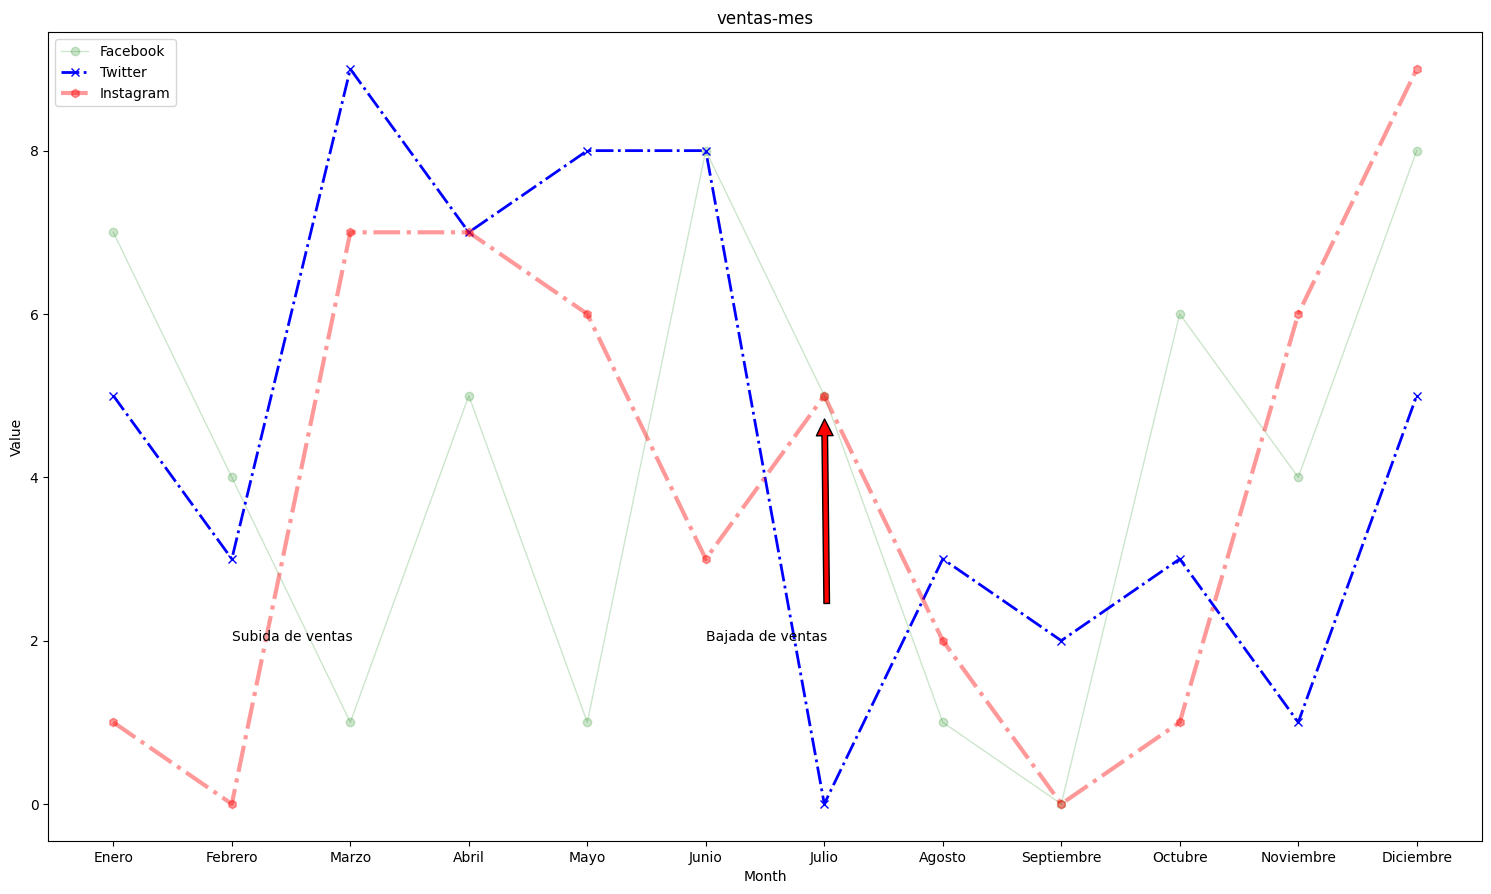

In [ ]:
mes = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(18.5, 10.5)
ax.plot(mes,np.random.randint(0,10,size=(12)),'go-',label='Facebook',linewidth=1,alpha=0.2)
ax.plot(mes,np.random.randint(0,10,size=(12)),'bx-.',label='Twitter',linewidth=2)
ax.plot(mes,np.random.randint(0,10,size=(12)),'rh-.',label='Instagram',linewidth=3, alpha=0.4)
ax.legend(loc='best')
ax.set_xlabel("Month")
ax.set_ylabel("Value")
ax.set_title("ventas-mes")
ax.text(mes[1],2,'Subida de ventas')
ax.annotate('Bajada de ventas', xy=(mes[6],5), xytext=(5, 2), arrowprops = dict(facecolor='red', shrink=0.1))

plt.show()



Carga los datos de un dataset de seaborn (distinto a 'tips', 'iris' o 'flights') https://github.com/mwaskom/seaborn-data
Si para alguno de los ejercicios no encuentras ejemplos en el dataset, busca otro para completarlo
Recuerda utilizar la versión 'Raw' si se utiliza la URL en el método read_csv
Representa visualmente la relación de cada pareja de atributos (variables)
Escoge una pareja (ambos valores contínuos y numéricos) y demuestra su correlación
Representa los valores de dos variables (x e y, numéricas) en base a otra variable (categórica)
Crea los gráficos que demuestren lo siguiente en el dataset seleccionado:
La distribución de valores (media, distribución, outliers) de una variable numérica contínua
Compara la distribución de esa variable con otra (contínua y numérica) para representar cuantitativamente la densidad de elementos por valor en ambas variables
Muestra un ejemplo en el dataset de una variable a la que un modelo de regresión lineal de orden > 1 sea más ajustado que uno de orden == 1

In [ ]:
import seaborn as sns
titanic = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")
titanic.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
761,0,3,male,41.0,0,0,7.125,S,Third,man,True,NaN,Southampton,no,True
726,1,2,female,30.0,3,0,21.000,S,Second,woman,False,NaN,Southampton,yes,False
751,1,3,male,6.0,0,1,12.475,S,Third,child,False,E,Southampton,yes,False
614,0,3,male,35.0,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True
369,1,1,female,24.0,0,0,69.300,C,First,woman,False,B,Cherbourg,yes,True


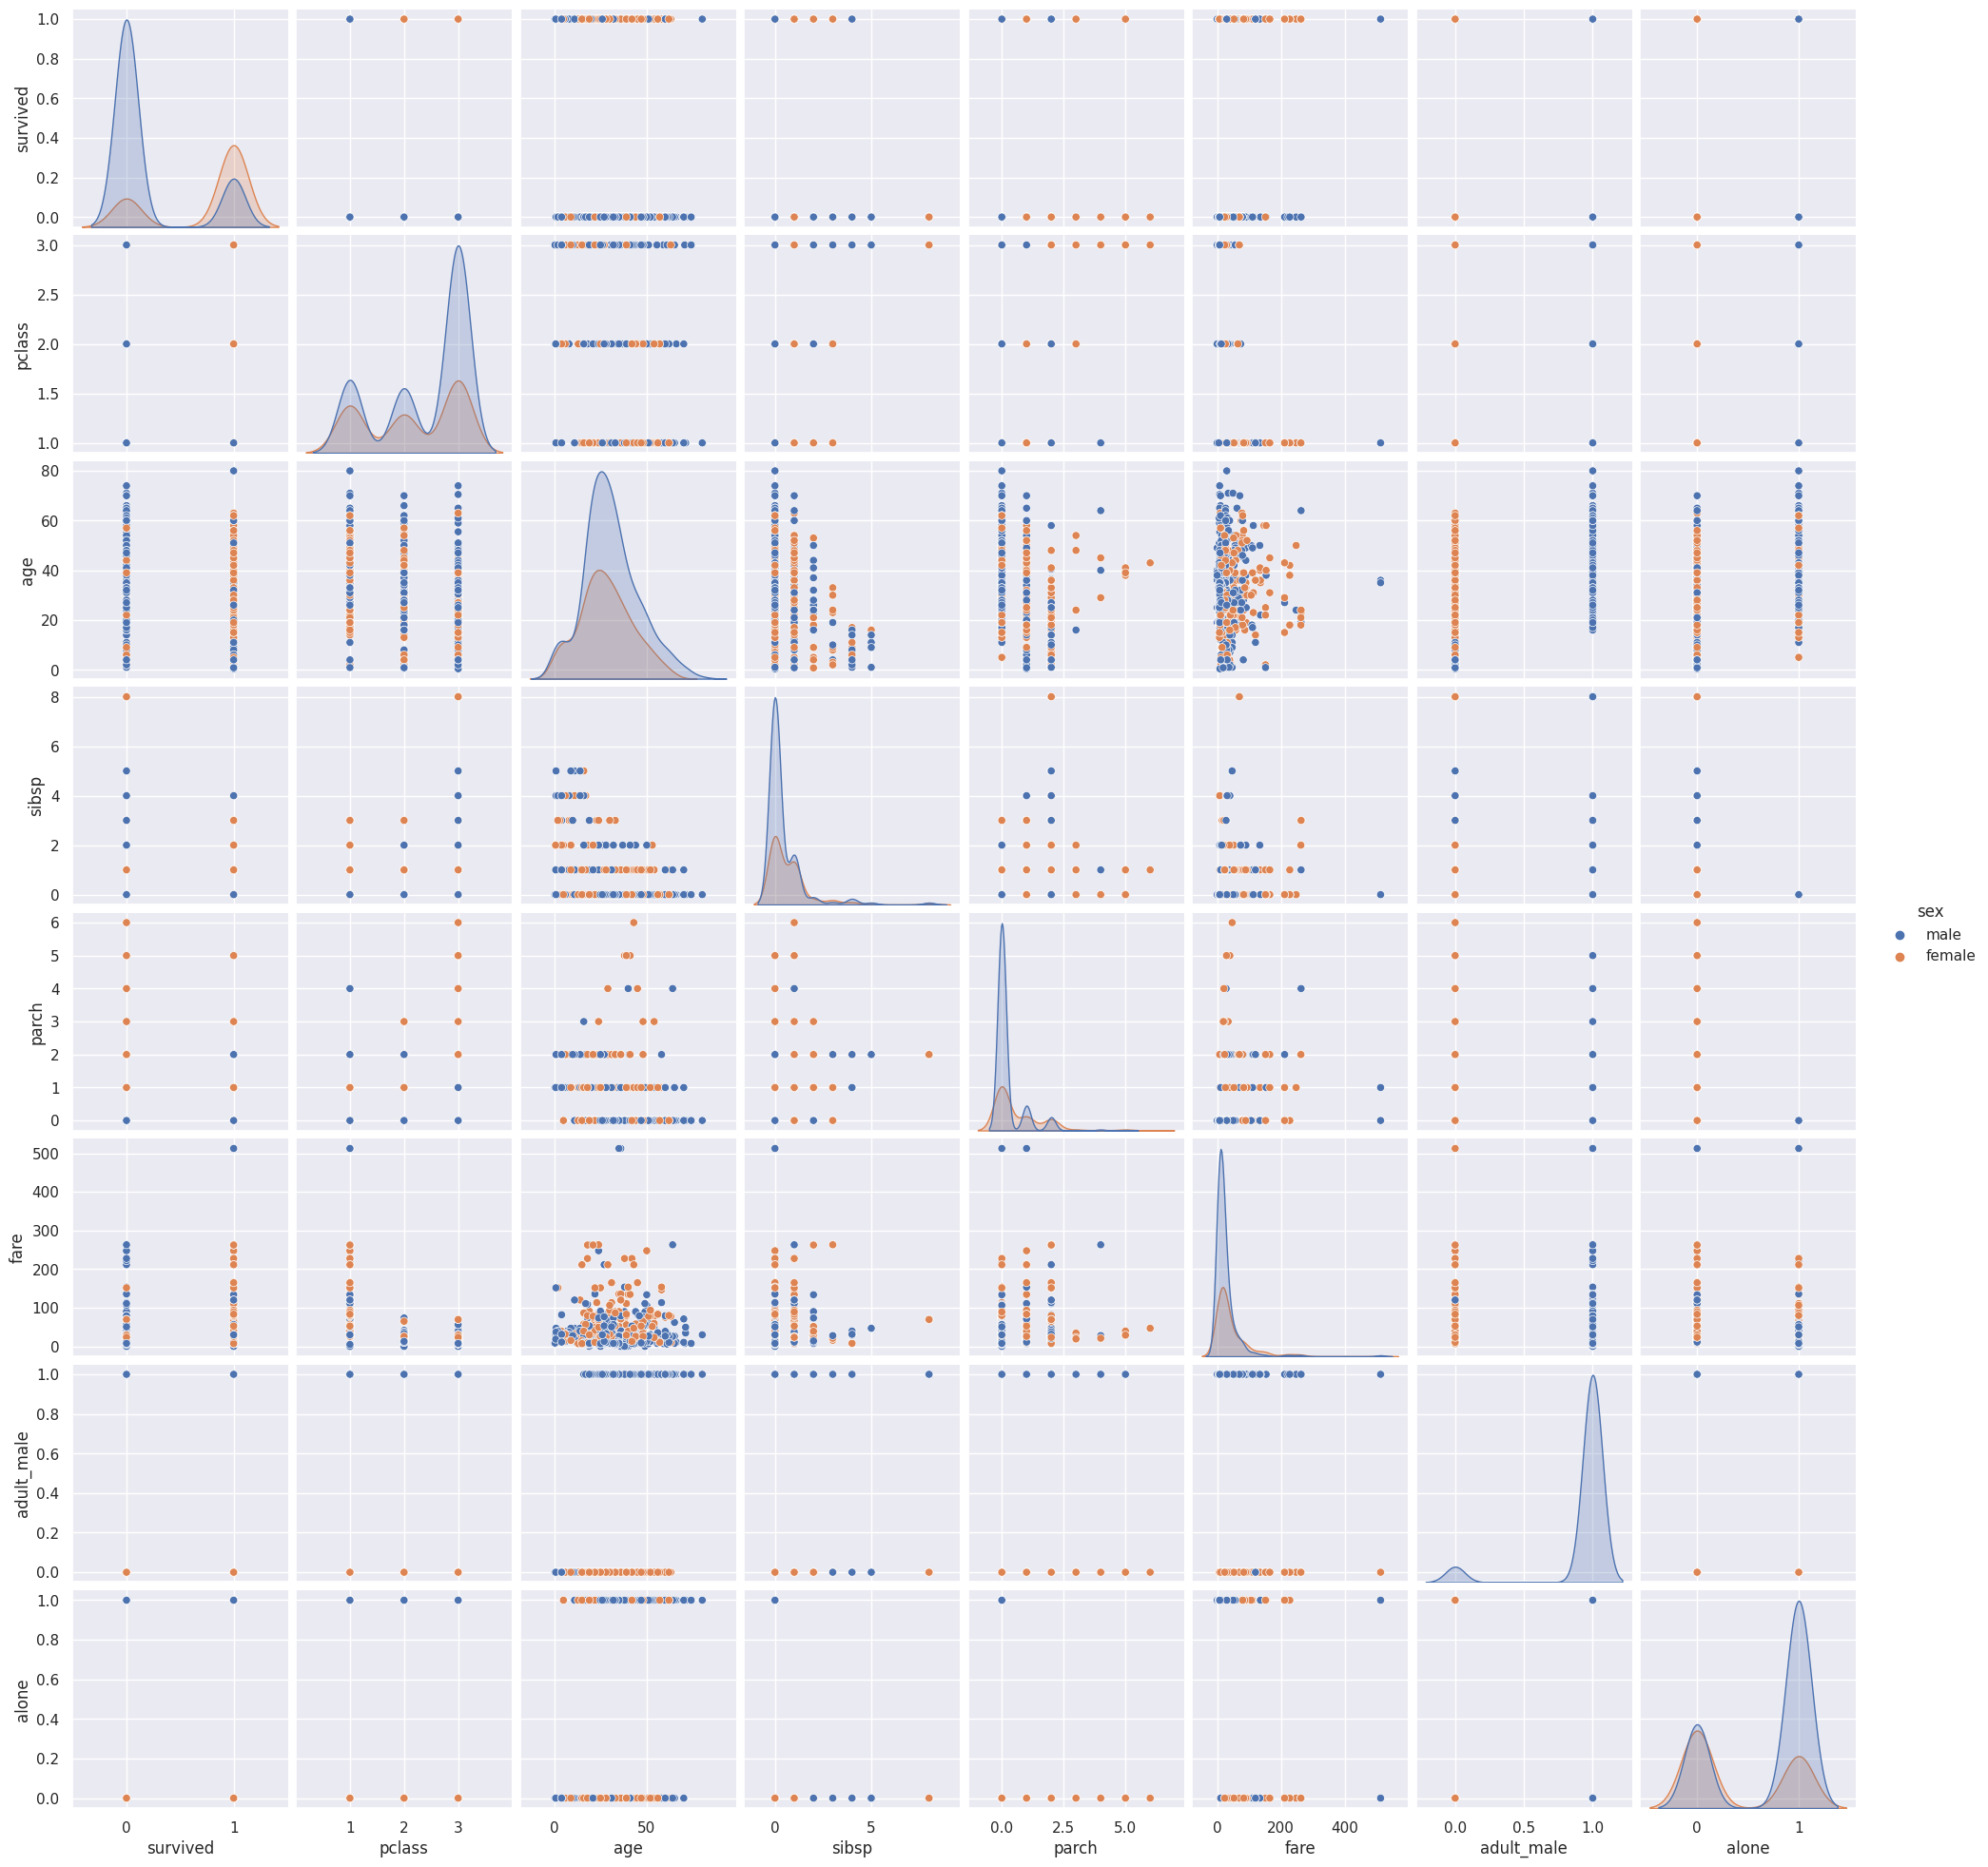

In [ ]:
#Representa visualmente la relación de cada pareja de atributos (variables)
sns.pairplot(titanic, hue = "sex")
plt.show()

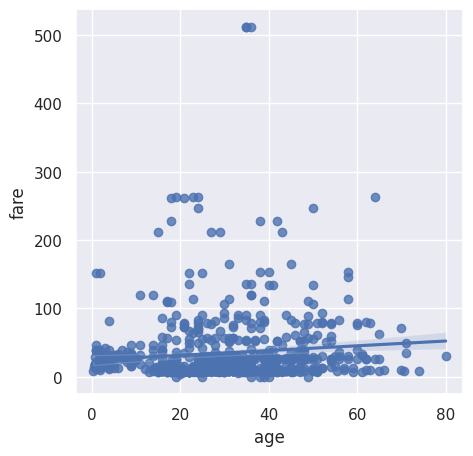

In [ ]:
#Escoge una pareja (ambos valores contínuos y numéricos) y demuestra su correlación
sns.regplot(x="age", y="fare", data=titanic)
plt.show()

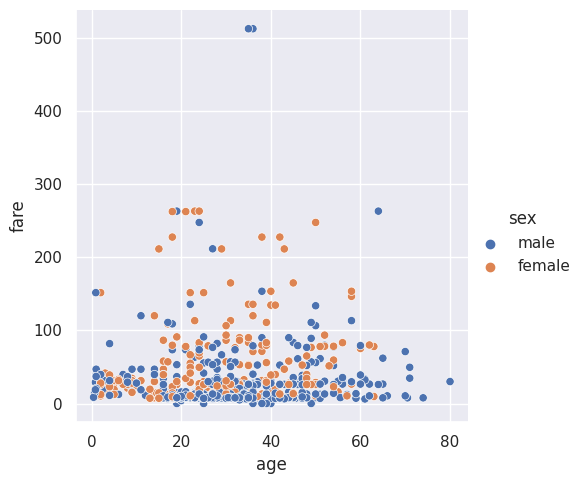

In [ ]:
#Representa los valores de dos variables (x e y, numéricas) en base a otra variable (categórica)
sns.relplot(x='age', y='fare', hue='sex', data=tips, kind='scatter')

- Dado un array de elementos, escribir una función, que reciba dicho array como parámetro de entrada y devuelva el elemento repetido. Usando plain Python, sin ninguna librería.

In [ ]:
array_src = [4, 8, 0, 3, 6, 2, 1, 5, 3, 9, 7]
expected_rep_element = 3
rep_element = repeated_element(array_src) # This calls your function repeated_element
assert(expected_rep_element == rep_element)  # This will fail if the element is not found correctly

In [ ]:
def repeated_element(array_src):
  for elemen in set(array_src):
    count = 0
    for i in range(len(array_src)):
      if elemen == array_src[i]:
        count += 1
      if count == 2:
        return elemen


## 02 - 1pt
- Genera una matriz con valores aleatorios de 0 a 100 de dimensiones 16x16
- Calcula los siguentes estadísticos en la matriz anterior, por fila (el resultado de cada uno debe ser un array de dimensiones 1x16)
  - Suma de los elementos de cada fila
  - Media de los elementos de cada fila
  - Valores mínimos de cada fila
  - Valores máximos de cada fila

In [ ]:
matriz = np.random.randint(0,100,(16,16), dtype='int64')
display(np.sum(matriz,axis=1))
display(np.mean(matriz,axis=1))
display(np.min(matriz,axis=1))
display(np.max(matriz,axis=1))

array([ 868,  861, 1007,  866,  890,  558,  622,  548,  935,  927,  857,
        899,  800,  640,  747,  934])

array([54.25  , 53.8125, 62.9375, 54.125 , 55.625 , 34.875 , 38.875 ,
       34.25  , 58.4375, 57.9375, 53.5625, 56.1875, 50.    , 40.    ,
       46.6875, 58.375 ])

array([ 1,  0,  5,  4, 10,  1,  1,  2, 10,  5, 14,  5,  6,  2,  0,  0])

array([97, 94, 96, 98, 96, 99, 71, 85, 97, 99, 91, 96, 80, 83, 96, 99])

## 03 - 1pt

- Generar un dataframe de 3x4 dimensiones con valores númericos aleatorios [0,10]
- Darle un índice semántico alfanumérico
- Aplicarle una función lambda que obtenga la diferencia entre el máximo y mínimo de cada fila

In [ ]:
matriz = np.random.randint(11,size=(3,4), dtype='int64')
display(matriz)
dataframe = pd.DataFrame(matriz, index = list("ABC"))
display(dataframe.apply(lambda x : x.max() - x.min(), axis=1))

array([[ 7,  5, 10,  9],
       [ 3,  6,  0,  4],
       [ 0,  3,  1,  6]])

A    5
B    6
C    6
dtype: int64

## 04 - 1pt
- Crear un array de NumPy de dimensiones 8x5, con números enteros aleatorios en el rango [-100, 100]
- Ejecutar en este orden
  - Reemplazar valores  
    - Reemplazar los valores de todos aquellos números múltiplos de 5 por 100
    - Reemplazar los valores de todos aquellos números múltiplos de 3 por Nan
   
  - Averiguar cuantos elementos tienen Nan por fila
  - Reemplazar los valores de Nan por 0

In [ ]:
matriz = np.random.randint(-100,101, size=(8,5))
display(matriz)
matriz[matriz % 5 == 0] = 100
matriz = matriz.astype(float)
matriz[matriz % 3 == 0] = np.nan
display(matriz)
display(np.isnan(matriz).sum(axis=1))
matriz[np.isnan(matriz)] = 0
display(matriz)

array([[-33,  11,  89,  71, -63],
       [ 36,   9, -86,   9,   5],
       [ 71, -19, -64, -97, -14],
       [ 34,  24,  -3, -76, -14],
       [-19,  12,  50,  59,  76],
       [ 95, -79,  86,  -7, -45],
       [ 32,   8,  97,  86, 100],
       [-61, -83, -67,  54,  -1]])

array([[ nan,  11.,  89.,  71.,  nan],
       [ nan,  nan, -86.,  nan, 100.],
       [ 71., -19., -64., -97., -14.],
       [ 34.,  nan,  nan, -76., -14.],
       [-19.,  nan, 100.,  59.,  76.],
       [100., -79.,  86.,  -7., 100.],
       [ 32.,   8.,  97.,  86., 100.],
       [-61., -83., -67.,  nan,  -1.]])

array([2, 3, 0, 2, 1, 0, 0, 1])

array([[  0.,  11.,  89.,  71.,   0.],
       [  0.,   0., -86.,   0., 100.],
       [ 71., -19., -64., -97., -14.],
       [ 34.,   0.,   0., -76., -14.],
       [-19.,   0., 100.,  59.,  76.],
       [100., -79.,  86.,  -7., 100.],
       [ 32.,   8.,  97.,  86., 100.],
       [-61., -83., -67.,   0.,  -1.]])

- Crear una función que reciba una lista de strings y devuelva una serie de pandas, y convierta el primer y último carácter de la palabra de cada elemento de la serie a mayúsculas

In [ ]:
languages = ['python', 'php', 'java', 'javascript', 'c++', 'sql']
expected_output = pd.Series(['PythoN', 'PhP', 'JavA', 'JavascripT', 'C++', 'SqL'])
output = first_last_uppercase(languages)  # This calls your function first_last_uppercase
assert(expected_output.equals(output))  # This will fail if the two lists are different

['PythoN', 'PhP', 'JavA', 'JavascripT', 'C++', 'SqL']


In [ ]:
def first_last_uppercase(languages):
  #languages = pd.Series(languages)
  new_string = []
  for word in languages:
    word =word[0].upper() + word[1:-1] + word[-1].upper()
    new_string.append(word)
  print(new_string)
  return pd.Series(new_string)






## 06 - 3 pt
- Adjunto al notebook se puede encontrar un fichero 'ine_paro_exam.csv' que contiene datos del INE referentes al paro en España
- Las columnas son las siguientes:
  - Sexo, los datos de esa fila se refieren a hombres, mujeres o ambos sexos
  - Provincias, los datos de esa fila son totales para todo el pais, o de alguna provincia en particular
  - Tasas, que tipo de tasa representa el valor de la fila, es de actividad, paro o empleo
  - Periodo, a que periodo de tiempo aplica el dato, año y trimestre
  - Total, el dato de la tasa
- Se pide lo siguiente:
  - Cargar los datos en un dataframe de Pandas y analizar los atributos
  - ¿Cuantos valores nulos hay por columna? Eliminar las filas que tienen nulo en la columna "Total"
  - Obtener la media anual de la tasa de paro, para ambos sexos y para el total nacional
  - Mostrar un resumen, donde en las filas aparezcan las provincias, y las tres tasas posibles (actividad, paro, empleo) en las columnas (obteniendo la media). Ordenar dicho resumen por la media de la tasa de paro ascendentemente
  - Representar graficamente una figura, sobre los datos para el total nacional y ambos sexos, de las tres diferentes tasas, cada una en una subfigura, de manera que en cada subfigura se represente la evolución por trimestre de cada año (cada año se considera una linea con un color diferente). Se adjunta al examen imagen de muestra de lo solicitado

In [ ]:
ruta = os.path.join("ine_paro_exam.csv")
ine_paro_exam = pd.read_csv(ruta, sep='|', )
#users_dataset = pd.read_csv(ruta, sep='|', header=None, names=['Sexo','Provincias','Tasas','Periodo','Total'], engine='python')
ine_paro_exam  = pd.read_csv(ruta, sep='|', index_col=False, header=0, names=['Sexo','Provincias','Tasas','Periodo','Total'], engine='python')
display(ine_paro_exam.head(10))
display(ine_paro_exam.describe(include='all'))
display(ine_paro_exam.info())

,Sexo,Provincias,Tasas,Periodo,Total
0,Ambos sexos,Total Nacional,Tasa de actividad,2023T1,58.55
1,Ambos sexos,Total Nacional,Tasa de actividad,2022T4,58.52
2,Ambos sexos,Total Nacional,Tasa de actividad,2022T3,58.86
3,Ambos sexos,Total Nacional,Tasa de actividad,2022T2,58.71
4,Ambos sexos,Total Nacional,Tasa de actividad,2022T1,58.50
5,Ambos sexos,Total Nacional,Tasa de actividad,2021T4,58.65
6,Ambos sexos,Total Nacional,Tasa de actividad,2021T3,59.14
7,Ambos sexos,Total Nacional,Tasa de actividad,2021T2,58.58
8,Ambos sexos,Total Nacional,Tasa de actividad,2021T1,57.69
9,Ambos sexos,Total Nacional,Tasa de actividad,2020T4,58.19


,Sexo,Provincias,Tasas,Periodo,Total
count,40545,40545,40545,40495,40445.000000
unique,3,53,3,85,NaN
top,Ambos sexos,Total Nacional,Tasa de actividad,2023T1,NaN
freq,13515,765,13515,477,NaN
mean,NaN,NaN,NaN,NaN,40.265056
std,NaN,NaN,NaN,NaN,19.330065
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,21.310000
50%,NaN,NaN,NaN,NaN,45.540000
75%,NaN,NaN,NaN,NaN,55.770000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40545 entries, 0 to 40544
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sexo        40545 non-null  object 
 1   Provincias  40545 non-null  object 
 2   Tasas       40545 non-null  object 
 3   Periodo     40495 non-null  object 
 4   Total       40445 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.5+ MB


None

In [ ]:
ine_paro_exam.count()

Sexo          40545
Provincias    40545
Tasas         40545
Periodo       40495
Total         40445
dtype: int64

In [ ]:
#¿Cuantos valores nulos hay por columna? Eliminar las filas que tienen nulo en la columna "Total"
display(ine_paro_exam.isnull().sum())
#display(ine_paro_exam.isna().sum())
#display(ine_paro_exam)
ine_paro_exam.drop(ine_paro_exam[pd.isnull(ine_paro_exam['Total'])].index, inplace= True)
display(ine_paro_exam.isnull().sum())
display(ine_paro_exam)

Sexo            0
Provincias      0
Tasas           0
Periodo        50
Total         100
dtype: int64

Sexo           0
Provincias     0
Tasas          0
Periodo       50
Total          0
dtype: int64

,Sexo,Provincias,Tasas,Periodo,Total
0,Ambos sexos,Total Nacional,Tasa de actividad,2023T1,58.55
1,Ambos sexos,Total Nacional,Tasa de actividad,2022T4,58.52
2,Ambos sexos,Total Nacional,Tasa de actividad,2022T3,58.86
3,Ambos sexos,Total Nacional,Tasa de actividad,2022T2,58.71
4,Ambos sexos,Total Nacional,Tasa de actividad,2022T1,58.50
...,...,...,...,...,...
40540,Mujeres,52 Melilla,Tasa de empleo de la población,2003T1,30.09
40541,Mujeres,52 Melilla,Tasa de empleo de la población,2002T4,29.64
40542,Mujeres,52 Melilla,Tasa de empleo de la población,2002T3,31.53
40543,Mujeres,52 Melilla,Tasa de empleo de la población,2002T2,30.03


In [ ]:
#Obtener la media anual de la tasa de paro, para ambos sexos y para el total nacional
#display(ine_paro_exam['Periodo'].unique())
ine_paro_exam[['Año', 'Trimestre']] = ine_paro_exam['Periodo'].str.split('T', expand=True)
display(ine_paro_exam.head(5))

display(ine_paro_exam[ine_paro_exam['Sexo'] == 'Ambos sexos'].groupby('Año')['Total'].mean())
display(ine_paro_exam[ine_paro_exam['Provincias'] == 'Total Nacional'].groupby('Año')['Total'].mean())

,Sexo,Provincias,Tasas,Periodo,Total,Año,Trimestre
0,Ambos sexos,Total Nacional,Tasa de actividad,2023T1,58.55,2023,1
1,Ambos sexos,Total Nacional,Tasa de actividad,2022T4,58.52,2022,4
2,Ambos sexos,Total Nacional,Tasa de actividad,2022T3,58.86,2022,3
3,Ambos sexos,Total Nacional,Tasa de actividad,2022T2,58.71,2022,2
4,Ambos sexos,Total Nacional,Tasa de actividad,2022T1,58.50,2022,1


Año
2002    36.528959
2003    37.310535
2004    37.878186
2005    38.427136
2006    38.790189
2007    39.211044
2008    40.077858
2009    40.947429
2010    41.394031
2011    41.717437
2012    42.368076
2013    42.453870
2014    41.996288
2015    41.657962
2016    41.155165
2017    40.639606
2018    40.476130
2019    40.268626
2020    39.599543
2021    40.155386
2022    39.986646
2023    39.947089
Name: Total, dtype: float64

Año
2002    38.448056
2003    39.193333
2004    39.631944
2005    38.941176
2006    40.435278
2007    40.785833
2008    41.660833
2009    42.557500
2010    42.882222
2011    43.115000
2012    43.598611
2013    43.557222
2014    43.102778
2015    42.758333
2016    42.248333
2017    41.681111
2018    41.298889
2019    41.131667
2020    40.586944
2021    41.007143
2022    40.966667
2023    40.945556
Name: Total, dtype: float64

Mostrar un resumen, donde en las filas aparezcan las provincias, y las tres tasas posibles (actividad, paro, empleo) en las columnas (obteniendo la media). Ordenar dicho resumen por la media de la tasa de paro ascendentemente



In [ ]:
display(ine_paro_exam.sample(5))
#display(ine_paro_exam.groupby(['Provincias', 'Tasas'])['Total'].mean().unstack())
resumen = ine_paro_exam.groupby(['Provincias', 'Tasas'])['Total'].mean().unstack()
resumen = resumen.sort_values(by='Tasa de paro de la población', ascending=True)
display(resumen)

,Sexo,Provincias,Tasas,Periodo,Total,Año,Trimestre
5749,Ambos sexos,18 Granada,Tasa de paro de la población,2009T3,27.33,2009,3
29130,Mujeres,"07 Balears, Illes",Tasa de actividad,2008T1,53.72,2008,1
23360,Hombres,"26 Rioja, La",Tasa de paro de la población,2005T3,3.76,2005,3
19987,Hombres,22 Huesca,Tasa de paro de la población,2020T1,8.60,2020,1
32971,Mujeres,19 Guadalajara,Tasa de actividad,2004T1,44.33,2004,1


Tasas,Tasa de actividad,Tasa de empleo de la población,Tasa de paro de la población
Provincias,,,
20 Gipuzkoa,57.349020,52.441686,8.678933
42 Soria,56.356118,50.961176,9.693686
22 Huesca,57.211220,51.628142,9.847843
31 Navarra,59.391922,53.420039,10.137725
25 Lleida,60.173137,53.903281,10.418976
01 Araba/Álava,59.739922,53.482627,10.549725
44 Teruel,53.859921,48.188819,10.577647
27 Lugo,51.165529,45.665647,10.808196
"26 Rioja, La",58.887961,52.140791,11.609725


Representar graficamente una figura, sobre los datos para el total nacional y ambos sexos, de las tres diferentes tasas, cada una en una subfigura, de manera que en cada subfigura se represente la evolución por trimestre de cada año (cada año se considera una linea con un color diferente). Se adjunta al examen imagen de muestra de lo solicitado

,Sexo,Provincias,Tasas,Periodo,Total,Año,Trimestre
7155,Ambos sexos,25 Lleida,Tasa de actividad,2019T2,61.47,2019,2
16439,Hombres,09 Burgos,Tasa de paro de la población,2014T3,17.00,2014,3
32862,Mujeres,18 Granada,Tasa de empleo de la población,2010T1,35.84,2010,1
26950,Hombres,52 Melilla,Tasa de empleo de la población,2021T4,54.23,2021,4
19826,Hombres,21 Huelva,Tasa de empleo de la población,2017T4,50.37,2017,4
10182,Ambos sexos,37 Salamanca,Tasa de empleo de la población,2006T2,46.13,2006,2
20910,Hombres,27 Lugo,Tasa de actividad,2023T1,54.90,2023,1
28072,Mujeres,01 Araba/Álava,Tasa de actividad,2017T3,51.63,2017,3
30194,Mujeres,10 Cáceres,Tasa de paro de la población,2018T2,21.27,2018,2
9276,Ambos sexos,"35 Palmas, Las",Tasa de paro de la población,2020T2,20.45,2020,2


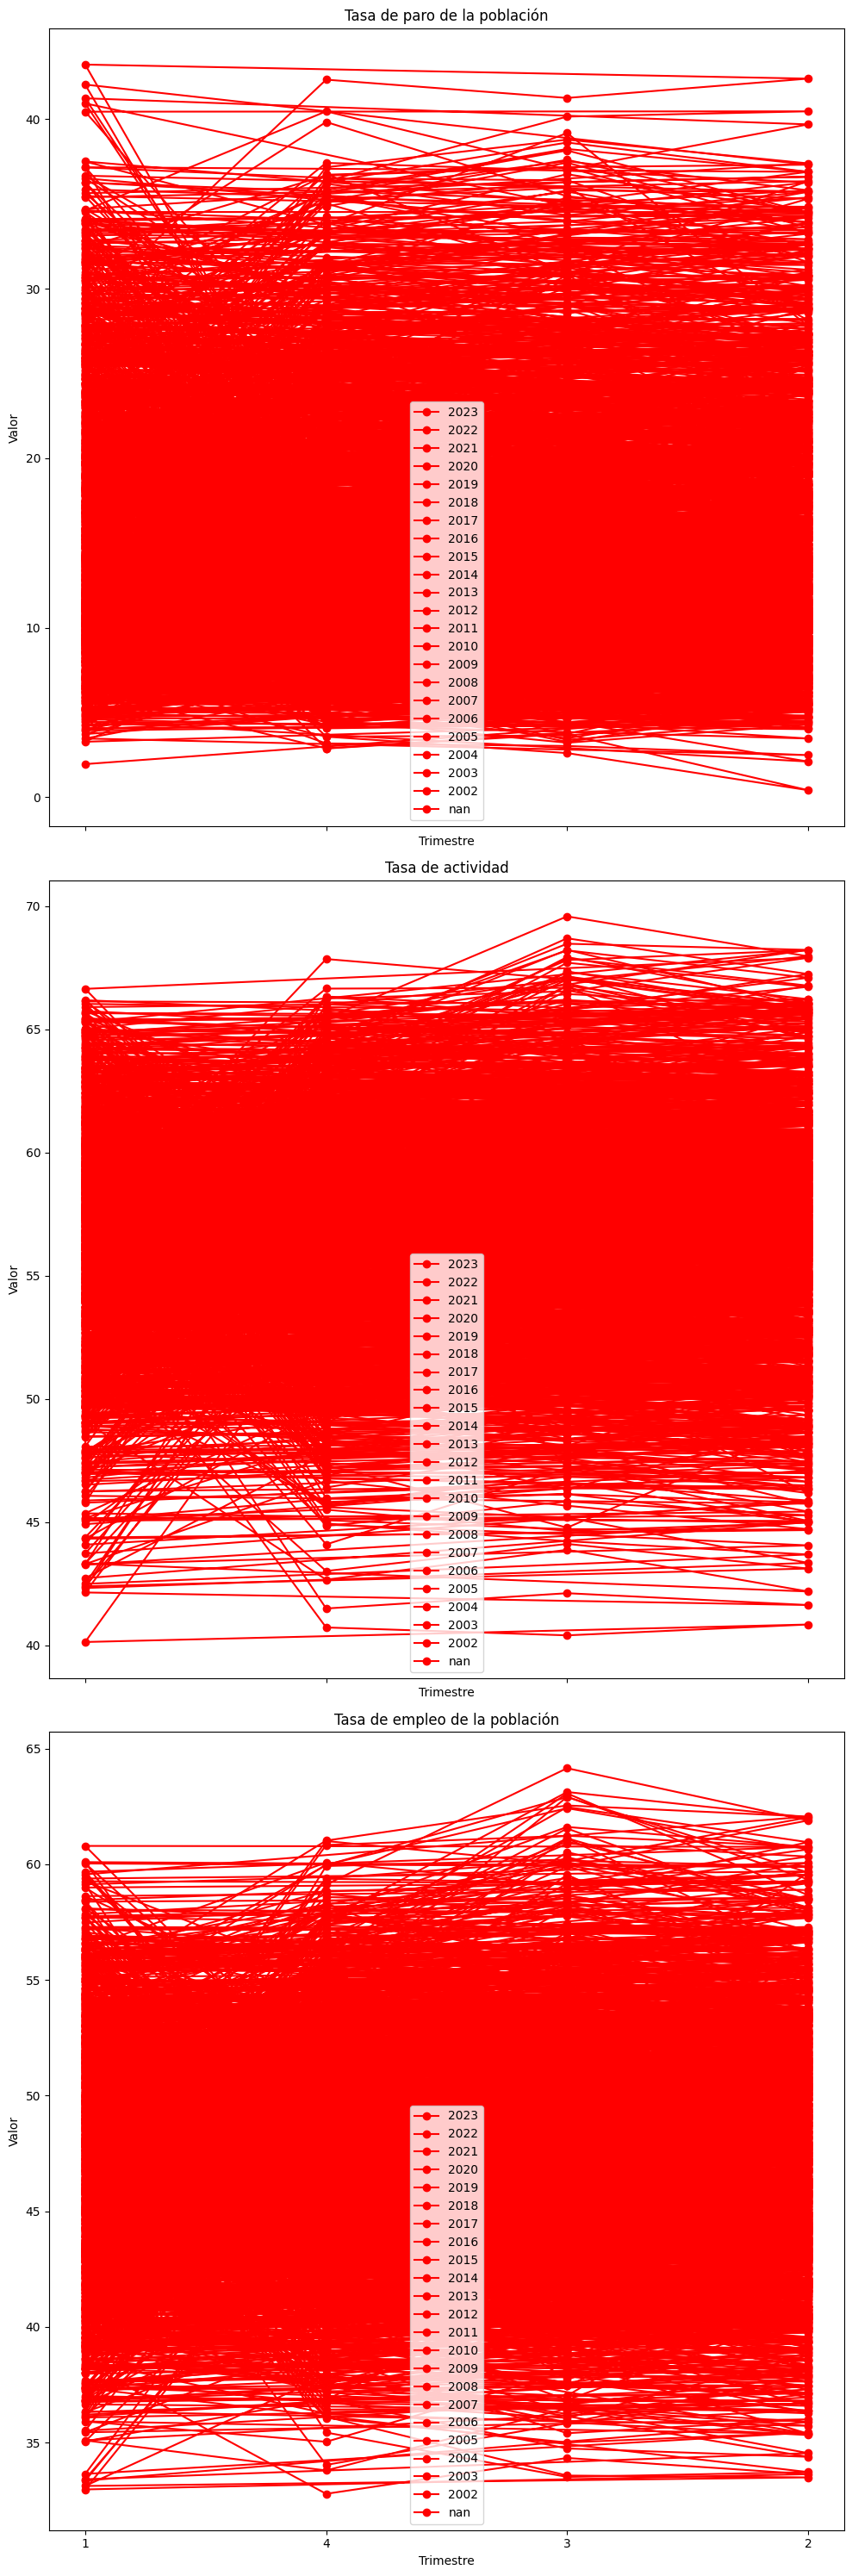

In [ ]:

display(ine_paro_exam.sample(50))
# Supongamos que ya tienes un DataFrame llamado 'ine_paro_exam' con tus datos.

# Filtrar las filas para obtener solo los datos de "Ambos sexos" y "Total Nacional".
filtro = (ine_paro_exam['Sexo'] == 'Ambos sexos')
datos_seleccionados = ine_paro_exam[filtro]

# Crear subplots con 3 subfiguras (una para cada tasa).
fig, axes = plt.subplots(3, 1, figsize=(10, 30), sharex=True)

# Lista de colores para asignar un color diferente a cada año.
colores = ['b', 'g', 'r', 'c', 'm', 'y', 'k', ]
colores_generador = (next(colores) for _ in range(len(datos_seleccionados['Año'].unique())))
# Iterar sobre las tasas y dibujar la evolución por trimestre de cada año.
for i, tasa in enumerate(['Tasa de paro de la población', 'Tasa de actividad', 'Tasa de empleo de la población']):
    ax = axes[i]
    datos_tasa = datos_seleccionados[datos_seleccionados['Tasas'] == tasa]
    años = datos_tasa['Año'].unique()

    for j, año in enumerate(años):
        datos_año = datos_tasa[datos_tasa['Año'] == año]
        trimestres = datos_año['Trimestre']
        valores = datos_año['Total']
        color = "red"
        ax.plot(trimestres, valores, label=str(año), color="red", marker='o')

    ax.set_title(tasa)
    ax.set_xlabel('Trimestre')
    ax.set_ylabel('Valor')
    ax.legend()

# Ajustar los espacios entre las subfiguras y mostrar el gráfico.
plt.tight_layout()
plt.show()







- Crear una función que reciba un array de NumPy y devuelva otro en el cual estén marcados como True los elementos duplicados (a partir de la segunda ocurrencia), y como False los no repetidos o las primeras ocurrencias de los duplicados.

In [ ]:
numbers = np.array([4, 4, 4, 3, 8, 1, 9, 6, 1, 5, 9, 4, 0, 2])
expected_output = np.array([False, True, True, False, False, False, False, False, True, False, True, True, False, False])
output = find_duplicates(numbers)   # This calls your function find_duplicates
assert(np.array_equal(expected_output, output))  # This will fail if the result is not as expected

In [ ]:
def find_duplicates(numbers):
#numbers = np.array([4, 4, 4, 3, 8, 1, 9, 6, 1, 5, 9, 4, 0, 2])
  unicos = np.unique(numbers, return_index=True)
  todos = np.full(len(numbers), fill_value=True)
  todos[unicos[1]] = False
  return todos


## 03
- Resolución de dos sistemas de ecuaciones
    - $ A : \begin{cases} -9x +  4y = 20 \\ -7y + 16x = 80                         \end{cases}$
    
    - $ B : \begin{cases} x - 2y + 3z = 7 \\ 2x + y + z = 4 \\ -3x + 2y -2z = -10 \end{cases}$
- Verifica por código los resultados

In [ ]:
import math

a = np.array([[-9,4], [16,-7]])
b = np.array([20,80])
x,y = np.linalg.solve(a,b)
print(f"x={x} y={y}")

print(math.isclose(-9*x+4*y,20))
print(math.isclose(-7*y+16*x,80))

x=460.0 y=1040.0
True
True


In [ ]:
a = np.array([[1,-2, 3], [2,1,1], [-3,2,-2]])
b = np.array([7,4,-10])
x,y,z = np.linalg.solve(a,b)
print(f"x={x} y={y} y={z}")

print(math.isclose(x-2*y+3*z,7))

x=2.0 y=-0.9999999999999998 y=1.0000000000000002
True


## 04
- Crear un objeto Series con 10 elementos, que contenga más de un tipo básico, con índices de tipo string
- Demuestra que los datos con índices posicionales son los mismos que los obtenidos con índices semánticos, seleccionando a través de slicing, al menos 4 elementos de la serie anterior

In [ ]:
serie = pd.Series([2, 3, 5, "Loco", False, 5, 4 ,5 ,6 ,7], index=list("ABCDERTOPS"))
display (serie.iloc[0:5]==serie.loc["A":"E"])

A    True
B    True
C    True
D    True
E    True
dtype: bool

## 05
- Crear un DataFrame de dimensiones 10x10, con números aleatorios en el rango `[0,20]`
- Reemplazar todos aquellos elementos menores de 5 por NaN
- Averiguar cuantos elementos tienen Nan por fila

In [ ]:
matriz = np.random.randint(21, size=(10, 10))
dataframe = pd.DataFrame(matriz)
dataframe[dataframe<5] = np.nan
display(dataframe)
np.isnan(dataframe).sum(axis=1)

,0,1,2,3,4,5,6,7,8,9
0,NaN,9.0,18.0,12.0,17.0,7.0,9.0,5.0,8.0,6.0
1,12.0,9.0,15.0,15.0,NaN,7.0,20.0,16.0,16.0,20.0
2,16.0,15.0,5.0,11.0,10.0,NaN,13.0,5.0,19.0,19.0
3,10.0,NaN,7.0,13.0,9.0,13.0,5.0,18.0,13.0,NaN
4,15.0,19.0,NaN,7.0,NaN,12.0,NaN,12.0,10.0,NaN
5,6.0,6.0,11.0,18.0,18.0,20.0,NaN,9.0,15.0,5.0
6,10.0,14.0,7.0,12.0,19.0,19.0,NaN,12.0,6.0,6.0
7,16.0,17.0,17.0,13.0,6.0,NaN,12.0,NaN,NaN,14.0
8,10.0,16.0,14.0,NaN,14.0,17.0,13.0,NaN,NaN,NaN
9,8.0,5.0,12.0,NaN,13.0,19.0,NaN,19.0,14.0,18.0


0    1
1    1
2    1
3    2
4    4
5    1
6    1
7    3
8    4
9    2
dtype: int64

## 01
- La serie de Fibonacci es una sucesión de números, en la cual cada número es la suma de los dos anteriores. Los dos primeros son siempre 0 y 1.
  - $F_0 = 0$
  - $F_1 = 1$
  - $F_n = F_{n-1} + F_{n-2}$
- Crear una serie de Fibonacci hasta un número *n* usando una función lambda.

In [ ]:
expected_fibo_serie = [0,1,1,2,3,5,8,13,21,34,55,89,144,233,377,610,987,1597]
fibo_serie = fibonacci_lambda(len(expected_fibo_serie))  # This calls your lambda function fibonacci_lambda
print(fibo_serie)
assert(expected_fibo_serie == fibo_serie)  # This will fail if the serie is not correct

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597]


In [ ]:
# Your solution HERE !!!!
from functools import reduce
fibonacci_lambda = lambda n: reduce(lambda x,y: x + [x[-1] + x[-2]], range(n-2), [0,1])

- Dada una lista de elementos, crea una función que devuelva un dataframe sin los elementos duplicados

In [ ]:
serie = ['a','b','c','a','c','a','g']
expected_output = pd.DataFrame(['a','b','c','g'])
output = remove_duplicates(serie)   # This will call tour function remove_duplicates
print(expected_output)
assert(expected_output.equals(output))  # This will fail if the result is not as expected

   0
0  a
1  b
2  c
3  g


In [ ]:
def remove_duplicates(serie):

  serie_unica = pd.DataFrame(pd.unique(serie))
  return serie_unica


## 07 - 1pt
- Escribir un generador `frange` que simule el comportamiento de la función `arange` de NumPy
- Esta función cada vez que se invoque debe devolver valores espaciados uniformemente a partir de un valor inicial. Se debe proveer a dicha función un valor inicial para la secuencia de números y un valor para el step
- Debe soportar valores númericos en coma flotante
- La función potencialmente se puede llamar un número infinito de veces
- Usando plain Python, sin ninguna librería

In [7]:
import math

init = 10.6
step = 0.8
g = frange(init, step)  # This calls your function frange

iters = 3
numbers = [next(g) for n in range(iters)]
for i, n in enumerate(numbers):
    assert(math.isclose(n, init + (step * i)))  # This will fail if the range is not properly created\
print(numbers)

[10.6, 11.4, 12.200000000000001]


In [6]:
# Your solution HERE !!!!
def frange(init, step):
    n = init
    while True:
        yield n
        n += step

## 07
- La serie de Fibonacci es una sucesión de números, en la cual cada número es la suma de los dos anteriores. Los dos primeros son siempre 0 y 1.
  - $F_0 = 0$
  - $F_1 = 1$
  - $F_n = F_{n-1} + F_{n-2}$
- Crear un generador infinito de números de Fibonacci.

In [13]:
fibo = [0,1,1,2,3,5,8,13,21,34,55,89,144,233,377,610,987,1597]
g = fibonacci_generator()  # This calls tour function fibonacci_generator
expected_output = [next(g) for n in range(len(fibo))]
assert(fibo == expected_output)  # This will fail if the output is not as expected

In [12]:
# Your solution HERE !!!!

def fibonacci_generator():
    a, b = 0, 1
    while True:
        yield a
        a, b = b, a + b




## 08
- Crear una función que reciba una Serie de Pandas y devuelva esa misma serie, reemplazando los espacios en blanco por el carácter menos frecuente en dicha serie.

In [ ]:
serie = pd.Series(list('bba cabc faabba aacbbfe'))
expected_output = pd.Series(list('bbaecabcefaabbaeaacbbfe'))
output = clean_whitespace_replace(serie)  # This calls your function clean_whitespace_replace
assert(expected_output.equals(output))  # This will fail if result is not as expected

In [ ]:
def clean_whitespace_replace(serie):
 serie = pd.Series(list('bba cabc faabba aacbbfe'))
 serie.replace(" ",serie.value_counts().idxmin(),inplace=True)
 return serie

In [ ]:
 def clean_whitespace_replace(serie):
  serie = pd.Series(list('bba cabc faabba aacbbfe'))
  min = serie.value_counts().idxmin()
  for i in range(len(serie)):
    if serie[i] == " ":
      serie[i] = min

  return serie

In [4]:
import numpy as np
def first_arrays():
	x, y, z= np.ogrid[-100:100, -100:100, -100:100]
	R = np.sqrt(x**2 + y**2 + z**2)
	print("Estructura del eje x: ",x.shape)
	print("Estructura del eje y: ",y.shape)
	print("Estructura del eje z: ",z.shape)
	print("Estructura del array con las distancias: ",R.shape)


In [5]:
first_arrays()

Estructura del eje x:  (200, 1, 1)
Estructura del eje y:  (1, 200, 1)
Estructura del eje z:  (1, 1, 200)
Estructura del array con las distancias:  (200, 200, 200)
